<a href="https://colab.research.google.com/github/PadmaJyothi-U/Deep-Learning/blob/main/multi_layered_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Experiment-4**

---


### **Multi-layered neural network**



A multi-layered neural network is a type of neural network that consists of one or more hidden layers between the input and output layers. These hidden layers perform the computation required to transform the input data into the output prediction.

Each layer in a multi-layered neural network is composed of multiple nodes, or neurons, which are connected to the neurons in the previous and next layers through weighted connections. The output of each neuron is computed as a function of the weighted sum of the inputs to the neuron, followed by an activation function. The activation function introduces non-linearity into the network and enables it to learn complex patterns in the data.



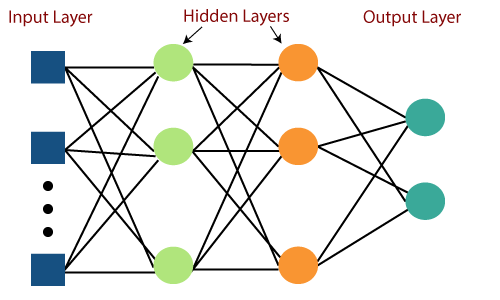

In [ ]:
from numpy import exp, array, random, dot

In [ ]:
class NeuronLayer():
    def __init__(self, number_of_neurons, number_of_inputs_per_neuron):
        self.synaptic_weights = 2 * random.random((number_of_inputs_per_neuron, number_of_neurons)) - 1

In [ ]:
class NeuralNetwork():
    def __init__(self, layer1, layer2):
        self.layer1 = layer1
        self.layer2 = layer2

    # The Sigmoid function, which describes an S shaped curve.
    # We pass the weighted sum of the inputs through this function to
    # normalise them between 0 and 1.
    def __sigmoid(self, x):
        return 1 / (1 + exp(-x))

    # The derivative of the Sigmoid function.
    # This is the gradient of the Sigmoid curve.
    # It indicates how confident we are about the existing weight.
    def __sigmoid_derivative(self, x):
        return x * (1 - x)
    
    # We train the neural network through a process of trial and error.
    # Adjusting the synaptic weights each time.
    def train(self, training_set_inputs, training_set_outputs, number_of_training_iterations):
        for iteration in range(number_of_training_iterations):
            # Pass the training set through our neural network
            output_from_layer_1, output_from_layer_2 = self.think(training_set_inputs)

            # Calculate the error for layer 2 (The difference between the desired output
            # and the predicted output).
            layer2_error = training_set_outputs - output_from_layer_2
            layer2_delta = layer2_error * self.__sigmoid_derivative(output_from_layer_2)

            # Calculate the error for layer 1 (By looking at the weights in layer 1,
            # we can determine by how much layer 1 contributed to the error in layer 2).
            layer1_error = layer2_delta.dot(self.layer2.synaptic_weights.T)
            layer1_delta = layer1_error * self.__sigmoid_derivative(output_from_layer_1)

            # Calculate how much to adjust the weights by
            layer1_adjustment = training_set_inputs.T.dot(layer1_delta)
            layer2_adjustment = output_from_layer_1.T.dot(layer2_delta)

            # Adjust the weights.
            self.layer1.synaptic_weights += layer1_adjustment
            self.layer2.synaptic_weights += layer2_adjustment

    # The neural network thinks.
    def think(self, inputs):
        output_from_layer1 = self.__sigmoid(dot(inputs, self.layer1.synaptic_weights))
        output_from_layer2 = self.__sigmoid(dot(output_from_layer1, self.layer2.synaptic_weights))
        return output_from_layer1, output_from_layer2

    # The neural network prints its weights
    def print_weights(self):
        print("    Layer 1 (4 neurons, each with 3 inputs): ")
        print(self.layer1.synaptic_weights)
        print("    Layer 2 (1 neuron, with 4 inputs):")
        print(self.layer2.synaptic_weights)

In [ ]:
if __name__ == "__main__":

    #Seed the random number generator
    random.seed(1)

    # Create layer 1 (4 neurons, each with 3 inputs)
    layer1 = NeuronLayer(4, 3)

    # Create layer 2 (a single neuron with 4 inputs)
    layer2 = NeuronLayer(1, 4)

    # Combine the layers to create a neural network
    neural_network = NeuralNetwork(layer1, layer2)

    print ("Stage 1) Random starting synaptic weights: ")
    neural_network.print_weights()

    # The training set. We have 7 examples, each consisting of 3 input values
    # and 1 output value.
    training_set_inputs = array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [0, 1, 0], [1, 0, 0], [1, 1, 1], [0, 0, 0]])
    training_set_outputs = array([[0, 1, 1, 1, 1, 0, 0]]).T

    # Train the neural network using the training set.
    # Do it 60,000 times and make small adjustments each time.
    neural_network.train(training_set_inputs, training_set_outputs, 60000)

    print("Stage 2- New synaptic weights after training: ")
    neural_network.print_weights()

    # Test the neural network with a new situation.
    print("Stage 3- Considering a new situation [1, 1, 0] -> ?: ")
    hidden_state, output = neural_network.think(array([1, 1, 0]))
    print(output)

Stage 1) Random starting synaptic weights: 
    Layer 1 (4 neurons, each with 3 inputs): 
[[-0.16595599  0.44064899 -0.99977125 -0.39533485]
 [-0.70648822 -0.81532281 -0.62747958 -0.30887855]
 [-0.20646505  0.07763347 -0.16161097  0.370439  ]]
    Layer 2 (1 neuron, with 4 inputs):
[[-0.5910955 ]
 [ 0.75623487]
 [-0.94522481]
 [ 0.34093502]]
Stage 2- New synaptic weights after training: 
    Layer 1 (4 neurons, each with 3 inputs): 
[[ 0.3122465   4.57704063 -6.15329916 -8.75834924]
 [ 0.19676933 -8.74975548 -6.1638187   4.40720501]
 [-0.03327074 -0.58272995  0.08319184 -0.39787635]]
    Layer 2 (1 neuron, with 4 inputs):
[[ -8.18850925]
 [ 10.13210706]
 [-21.33532796]
 [  9.90935111]]
Stage 3- Considering a new situation [1, 1, 0] -> ?: 
[0.0078876]
